In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Dataset/transactions_dataset.csv", sep=";")

In [3]:
df

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051
...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015


In [4]:
df["product_id"].nunique()

607418

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [7]:
# Display settings
pd.set_option("display.float_format", lambda x: "%.2f" % x)


In [8]:
# Check basic info
print("Basic Information:")
print(df.info())


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319315 entries, 0 to 63319314
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date_order     object 
 1   date_invoice   object 
 2   product_id     int64  
 3   client_id      int64  
 4   sales_net      float64
 5   quantity       int64  
 6   order_channel  object 
 7   branch_id      int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.8+ GB
None


In [9]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
date_order       0
date_invoice     1
product_id       0
client_id        0
sales_net        0
quantity         0
order_channel    0
branch_id        0
dtype: int64


In [10]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
       product_id   client_id   sales_net    quantity   branch_id
count 63319315.00 63319315.00 63319315.00 63319315.00 63319315.00
mean   1632320.74  1139833.02      147.94       92.16     5466.71
std     918452.40   655253.57      864.65      867.48     3175.26
min         15.00        6.00 -1738816.56        3.00       20.00
25%     851737.00   565847.00       14.15        3.00     2907.00
50%    1621731.00  1152241.00       44.24        5.00     5226.00
75%    2434262.00  1706977.00      131.47       21.00     8361.00
max    3238833.00  2274517.00  1740456.00   198001.00    11057.00


In [11]:
# Check unique values in categorical columns
categorical_columns = ["order_channel", "branch_id"]
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())



Unique values in order_channel:
order_channel
at the store                       32114196
by phone                           25465205
online                              5651866
other                                 58735
during the visit of a sales rep       29313
Name: count, dtype: int64

Unique values in branch_id:
branch_id
3318    643183
1888    575688
4080    536279
5489    480545
6702    445282
         ...  
9499         3
2986         3
4933         2
9125         1
2925         1
Name: count, Length: 582, dtype: int64


In [12]:
# Convert dates to datetime format
df["date_order"] = pd.to_datetime(df["date_order"])
df["date_invoice"] = pd.to_datetime(df["date_invoice"])


In [13]:
# Extract additional time features
df["year"] = df["date_order"].dt.year
df["month"] = df["date_order"].dt.month
df["day_of_week"] = df["date_order"].dt.day_name()


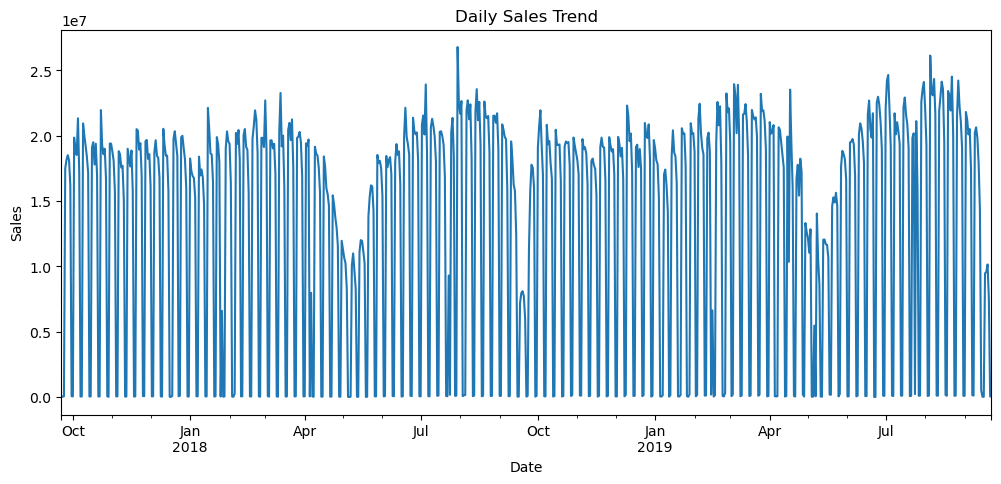

In [14]:
# Sales trends over time
plt.figure(figsize=(12, 5))
df.groupby("date_order")["sales_net"].sum().plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


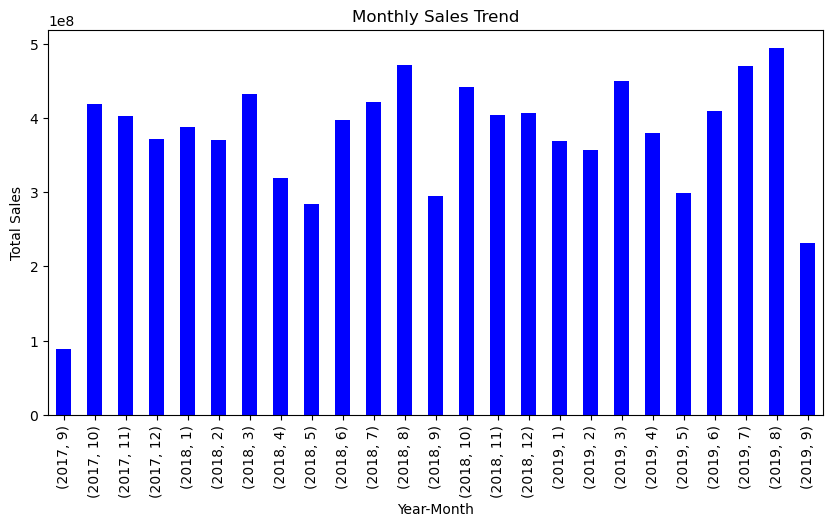

In [15]:
# Monthly sales trend
plt.figure(figsize=(10, 5))
df.groupby(["year", "month"])["sales_net"].sum().plot(kind="bar", color="blue")
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.show()


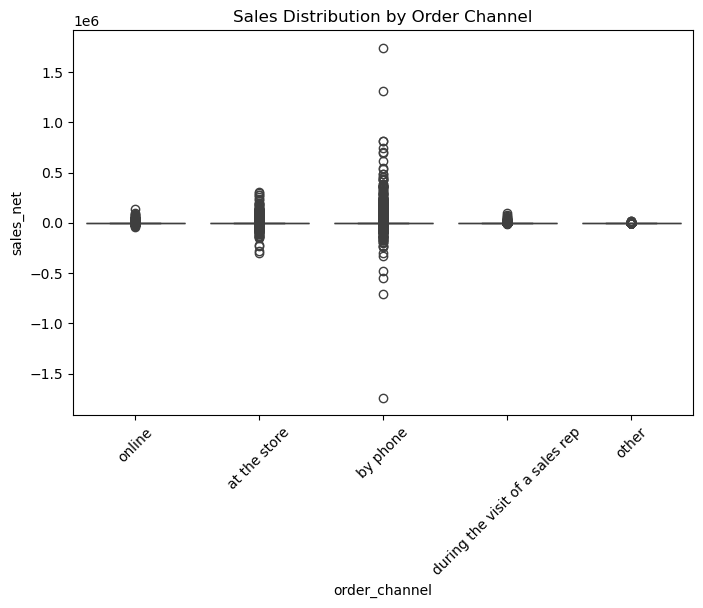

In [16]:
# Sales distribution across order channels
plt.figure(figsize=(8, 5))
sns.boxplot(x="order_channel", y="sales_net", data=df)
plt.title("Sales Distribution by Order Channel")
plt.xticks(rotation=45)
plt.show()


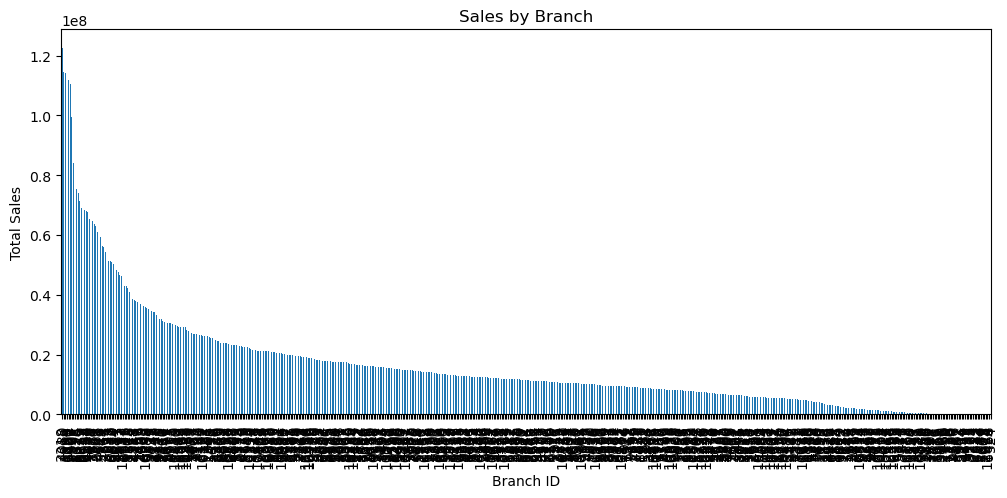

In [17]:
# Sales performance by branch
plt.figure(figsize=(12, 5))
df.groupby("branch_id")["sales_net"].sum().sort_values(ascending=False).plot(kind="bar")
plt.title("Sales by Branch")
plt.xlabel("Branch ID")
plt.ylabel("Total Sales")
plt.show()


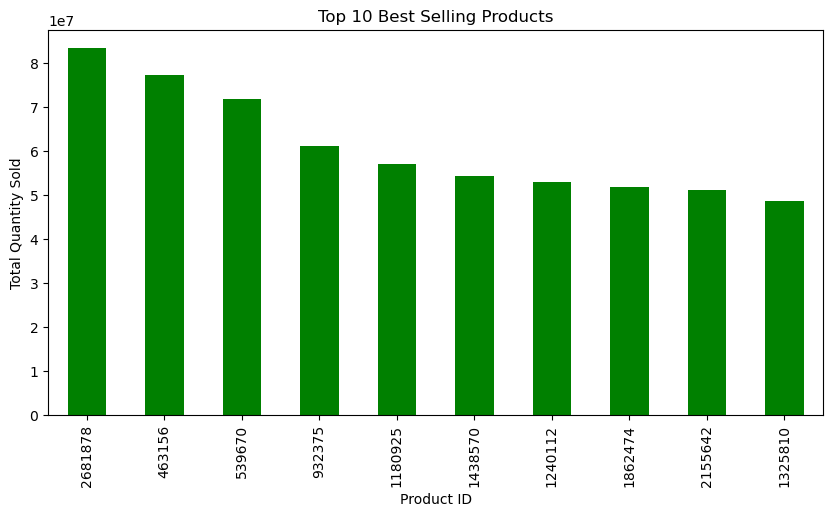

In [18]:
# Best-selling products
top_products = (
    df.groupby("product_id")["quantity"].sum().sort_values(ascending=False).head(10)
)
plt.figure(figsize=(10, 5))
top_products.plot(kind="bar", color="green")
plt.title("Top 10 Best Selling Products")
plt.xlabel("Product ID")
plt.ylabel("Total Quantity Sold")
plt.show()


KeyboardInterrupt: 

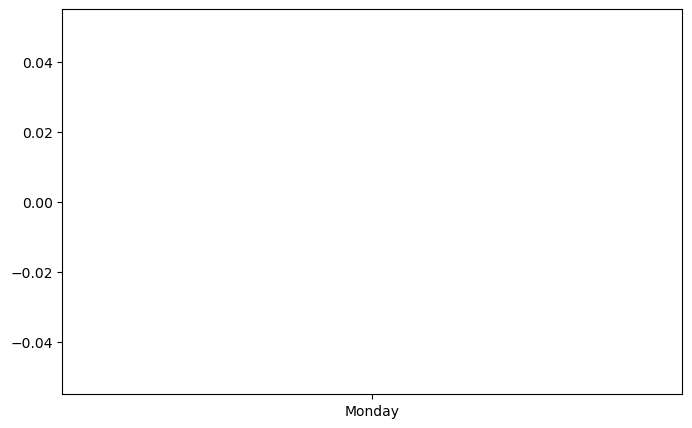

In [19]:
# Order volume by day of the week
plt.figure(figsize=(8, 5))
sns.barplot(
    x="day_of_week",
    y="quantity",
    data=df,
    estimator=np.sum,
    order=[
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ],
)
plt.title("Total Orders by Day of the Week")
plt.show()


In [22]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(
    df.drop(columns="order_channel").corr(), annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Matrix")
plt.show()


KeyboardInterrupt: 

<Figure size 800x500 with 0 Axes>

In [ ]:
# Outliers detection in sales
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["sales_net"])
plt.title("Outliers in Sales")
plt.show()


In [25]:
# Calculate the difference in days
df["invoice_delay"] = (df["date_invoice"] - df["date_order"]).dt.days

# Summary statistics of invoice delay
print("\nSummary Statistics of Invoice Delay:")
print(df["invoice_delay"].describe())

# Count occurrences of each delay
delay_counts = df["invoice_delay"].value_counts().sort_index()
print("\nInvoice Delay Counts:")
print(delay_counts.head(10))  # Display the most frequent delays



Summary Statistics of Invoice Delay:
count   63319314.00
mean           5.05
std           19.90
min         -406.00
25%            0.00
50%            0.00
75%            1.00
max         1302.00
Name: invoice_delay, dtype: float64

Invoice Delay Counts:
invoice_delay
-406.00    24
-316.00     9
-203.00     2
-187.00     3
-178.00     9
-124.00     3
-112.00     1
-109.00     1
-51.00      7
-15.00      1
Name: count, dtype: int64


In [24]:
import gc

gc.collect()

4565

In [26]:
# Filter rows where invoice_delay is negative
negative_delays = df[df["invoice_delay"] < 0]

# Display a few rows
print(negative_delays.head(10))


      date_order date_invoice  product_id  client_id  sales_net  quantity  \
180   2017-11-22   2016-10-12     2682544     492273      56.40       201   
181   2017-11-22   2016-10-12     2682889     492273      19.27         5   
2206  2017-11-22   2016-10-12      278467     492273     163.23         3   
2207  2017-11-22   2016-10-12     3079148     492273      70.71         3   
4604  2017-11-22   2016-10-12     2439149     492273       9.41         3   
5491  2017-09-29   2017-08-09     1840980    1169471      62.89        25   
14975 2017-09-29   2017-08-09      573146    1169471      47.97        31   
22600 2017-11-22   2016-10-12      482165     492273       0.69         5   
30664 2017-11-22   2016-10-12      877465     492273      77.56         5   
36265 2017-09-29   2017-08-09      355864    1169471       0.00        17   

      order_channel  branch_id  year  month day_of_week  invoice_delay  
180    at the store       3754  2017     11   Wednesday        -406.00  
181   